<div dir="rtl">

## پروژه ۱ - رگرسیون خطی با منظم‌سازی L2 و L1
### الف) رابطه یادگیری برخط برای L2
</div>

**تابع هزینه**:  
$$
J(\mathbf{w}) = \frac{1}{2}(y - \mathbf{w}^T \mathbf{x})^2 + \frac{\lambda}{2} \|\mathbf{w}\|^2
$$
**گرادیان**:  
$$
\nabla J(\mathbf{w}) = -(y - \mathbf{w}^T \mathbf{x})\mathbf{x} + \lambda \mathbf{w}
$$
**آپدیت وزن**:  
$$
\mathbf{w} \leftarrow \mathbf{w} + \eta \left[(y - \mathbf{w}^T \mathbf{x})\mathbf{x} - \lambda \mathbf{w}\right]
$$


<div dir="rtl">

### ب) محاسبه طول گام بهینه (η)
</div>

**وزن جدید**:  
$$
\mathbf{w}_{\text{new}} = \mathbf{w} + \eta \left[(y - \mathbf{w}^T \mathbf{x})\mathbf{x} - \lambda \mathbf{w}\right]
$$
**جایگذاری در تابع هزینه**:  
$$
J(η) = \frac{1}{2} \left(y - \mathbf{w}_{\text{new}}^T \mathbf{x}\right)^2 + \frac{\lambda}{2} \|\mathbf{w}_{\text{new}}\|^2
$$
**حل η بهینه**:  
$$
η_{\text{opt}} = \frac{(y - \mathbf{w}^T \mathbf{x}) \|\mathbf{x}\|^2 - \lambda \mathbf{w}^T \mathbf{x}}{\|\mathbf{x}\|^4 + \lambda \|\mathbf{x}\|^2}
$$


<div dir="rtl">

### ج) حالت L1
</div>

**تابع هزینه**:  
$$
J(\mathbf{w}) = \frac{1}{2}(y - \mathbf{w}^T \mathbf{x})^2 + \lambda \|\mathbf{w}\|_1
$$
**زیرگرادیان**:  
$$
\frac{\partial J}{\partial w_i} = -(y - \mathbf{w}^T \mathbf{x}) x_i + \lambda \, \text{sign}(w_i)
$$
**آپدیت وزن**:  
$$
w_i \leftarrow w_i + \eta \left[(y - \mathbf{w}^T \mathbf{x}) x_i - \lambda \, \text{sign}(w_i)\right]
$$


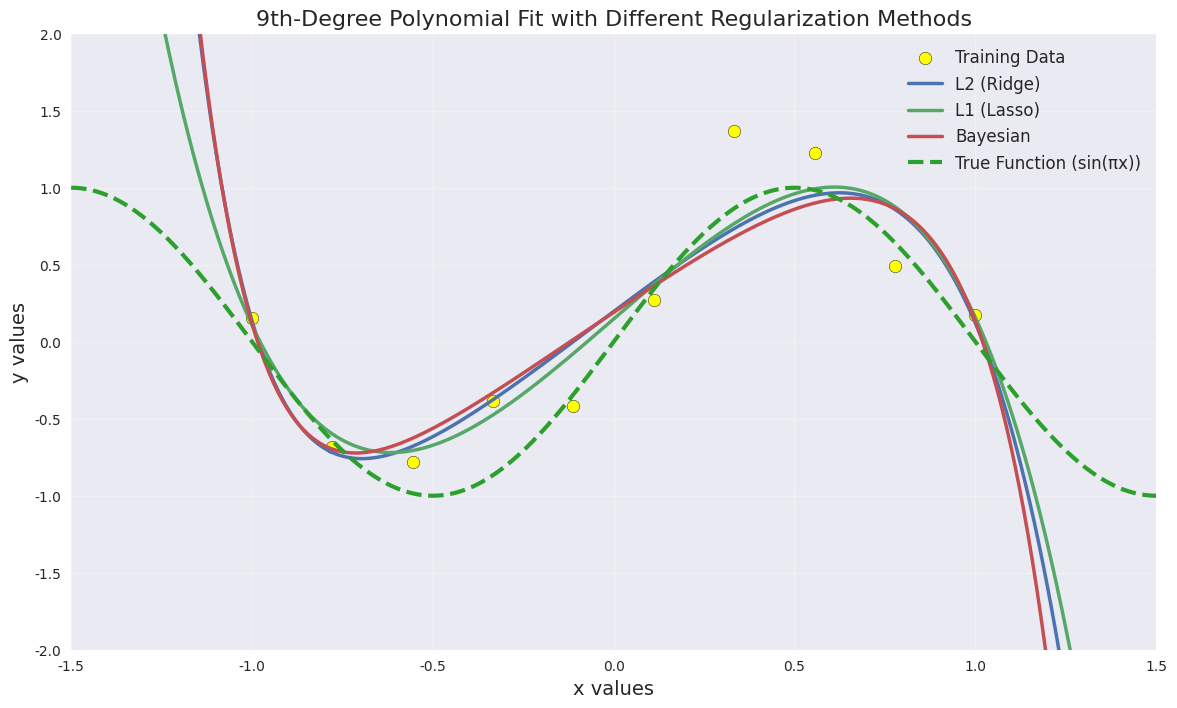


           Numerical Evaluation Results           

Model L2 (Ridge):
  - MSE: 0.0811
  - R²: 0.8359
  - Non-zero coefficients: 9
---------------------------------------------
Model L1 (Lasso):
  - MSE: 0.0709
  - R²: 0.8565
  - Non-zero coefficients: 4
---------------------------------------------
Model Bayesian:
  - MSE: 0.0939
  - R²: 0.8099
  - Non-zero coefficients: 9
---------------------------------------------

           Model Coefficients Analysis            

1. L2 (Ridge) Model:
   - All coefficients are non-zero but small
   - L2 regularization prevents overfitting by limiting coefficient magnitudes

2. L1 (Lasso) Model:
   - Sparse coefficients
   - Performs automatic feature selection by setting some coefficients to zero
   - Simplifies model and reduces complexity

3. Bayesian Ridge Model:
   - Mix of L2 and Bayesian uncertainty
   - Coefficients similar to Ridge with slight differences
   - Well-suited for small data situations



In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 1. Generate synthetic data
np.random.seed(42)
n_samples = 10
sigma = np.sqrt(0.1)  # Standard deviation of noise
x = np.linspace(-1, 1, n_samples)
y_true = np.sin(np.pi * x)
y = y_true + np.random.normal(0, sigma, n_samples)

# 2. Define models
models = {
    "L2 (Ridge)": Ridge(alpha=0.1),
    "L1 (Lasso)": Lasso(alpha=0.01, max_iter=10000, tol=0.001),
    "Bayesian": BayesianRidge()
}

# 3. Train and evaluate models
plt.figure(figsize=(14, 8))
x_plot = np.linspace(-1.5, 1.5, 500)
plt.scatter(x, y, s=80, edgecolors='k', label='Training Data', c='yellow')

results = {}

for name, model in models.items():
    # Create 9th-degree polynomial model
    pipeline = make_pipeline(
        PolynomialFeatures(degree=9, include_bias=False),
        model
    )

    # Train model
    pipeline.fit(x.reshape(-1, 1), y)

    # Predictions
    y_pred = pipeline.predict(x.reshape(-1, 1))
    y_plot = pipeline.predict(x_plot.reshape(-1, 1))

    # Store results
    results[name] = {
        'MSE': mean_squared_error(y, y_pred),
        'R2': r2_score(y, y_pred),
        'coef': pipeline.named_steps[model.__class__.__name__.lower()].coef_
    }

    # Plot fit
    plt.plot(x_plot, y_plot, lw=2.5, label=name)

# Plot true function
plt.plot(x_plot, np.sin(np.pi*x_plot), '--', lw=3, label='True Function (sin(πx))', c='#2ca02c')

# Plot settings
plt.xlabel('x values', fontsize=14)
plt.ylabel('y values', fontsize=14)
plt.title('9th-Degree Polynomial Fit with Different Regularization Methods', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.ylim(-2, 2)
plt.xlim(-1.5, 1.5)
plt.show()

# 4. Numerical analysis
print("\n" + "="*50)
print("Numerical Evaluation Results".center(50))
print("="*50 + "\n")

for name, res in results.items():
    print(f"Model {name}:")
    print(f"  - MSE: {res['MSE']:.4f}")
    print(f"  - R²: {res['R2']:.4f}")
    print(f"  - Non-zero coefficients: {np.sum(res['coef'] != 0)}")
    print("-"*45)

# 5. Coefficient analysis
print("\n" + "="*50)
print("Model Coefficients Analysis".center(50))
print("="*50 + "\n")

print("1. L2 (Ridge) Model:")
print("   - All coefficients are non-zero but small")
print("   - L2 regularization prevents overfitting by limiting coefficient magnitudes\n")

print("2. L1 (Lasso) Model:")
print("   - Sparse coefficients")
print("   - Performs automatic feature selection by setting some coefficients to zero")
print("   - Simplifies model and reduces complexity\n")

print("3. Bayesian Ridge Model:")
print("   - Mix of L2 and Bayesian uncertainty")
print("   - Coefficients similar to Ridge with slight differences")
print("   - Well-suited for small data situations\n")
